### Применение TSLearn к анализу временной серии с использованием DropOut

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.datasets import CachedDatasets

In [2]:
from load_csv import df
# clear all indexes
df = df.reset_index(drop=True)
df1 = df[['Date','Infections']]
df1.reset_index(drop=True)
df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])
l = df1['Date']
ts = df1['Inf_day']
data = ts.values
X = data.reshape(data.shape[0])
print(X)


            Infections  Dead  Recover  Infect_by_date  inf_day
Date                                                          
28.03.2020           6     0        0               6      NaN
29.03.2020           6     0        0               6      0.0
30.03.2020           9     1        0               8      3.0
31.03.2020           9     1        0               8      0.0
01.04.2020           9     2        0               7      0.0
['Infections', 'Dead', 'Recover', 'Infect_by_date', 'inf_day']
Date
28.03.2020   2020-03-28
29.03.2020   2020-03-29
30.03.2020   2020-03-30
31.03.2020   2020-03-31
01.04.2020   2020-04-01
                ...    
30.05.2023   2023-05-30
06.06.2023   2023-06-06
13.06.2023   2023-06-13
20.06.2023   2023-06-20
27.06.2023   2023-06-27
Name: Date, Length: 1149, dtype: datetime64[ns]
Date
28.03.2020       0.0
29.03.2020       1.0
30.03.2020       2.0
31.03.2020       3.0
01.04.2020       4.0
               ...  
30.05.2023    1158.0
06.06.2023    1165.0
13.06.

C:\Users\Alex\AppData\Local\Temp\ipykernel_160976\3674077191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Inf_day'] = df1['Infections'].diff().fillna(df1['Infections'])


In [3]:
# Normalize the data
import matplotlib.pyplot as plt
# Normalize the data
scaler = TimeSeriesScalerMeanVariance()
X_normalized = scaler.fit_transform([X])

X_n = X_normalized[0]
                                    
print(X_n)
#plt.plot(X_normalized)тся


[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


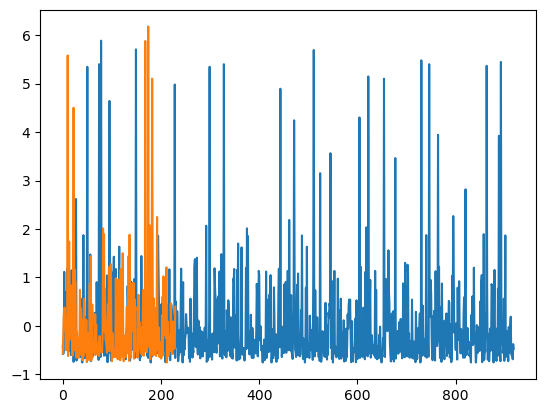

In [4]:
from tslearn.utils import to_time_series_dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_n, X_n, test_size=0.2, random_state=42)
plt.plot(X_train)
plt.plot(X_test)


In [11]:
from keras.models import Sequential
from keras.layers import GRU, Dropout,Dense

# Set the number of units 20 - 100
UNITS = 100
DROPOUT = 0.2

# Build the GRU model
model = Sequential()
model.add(GRU(units=UNITS, activation='relu', return_sequences=False, input_shape=(X_normalized.shape[1], X_normalized.shape[2])))
model.add(Dropout(DROPOUT))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mse')

In [12]:
EPOCHS = 100
BATCH_SIZE = 30

# Train the model
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/100
31/31 [==============================] - 2s 12ms/step - loss: 0.7051 - val_loss: 0.5628
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3986 - val_loss: 0.2742
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.1583 - val_loss: 0.0885
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.0182
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0072
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.0037
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.0018
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0123 - val_loss: 0.0011
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 7.6358e-04
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 8.3534e-04


In [13]:
# Make predictions on the entire dataset
print(X_n)


[[-0.7141232 ]
 [-0.75404669]
 [-0.73408494]
 ...
 [-0.60100664]
 [-0.68085362]
 [-0.57439098]]


In [14]:
# y_pred = model.predict(X_n.reshape(X_n.shape[0], X_n.shape[1], 1))
y_pred = model.predict(X_n)
# Print the predictions

print(y_pred)

36/36 [==============================] - 0s 872us/step
[[-0.687785  ]
 [-0.71206355]
 [-0.6999116 ]
 ...
 [-0.6096129 ]
 [-0.6671902 ]
 [-0.5852213 ]]


In [15]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(X_n, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0008189463175621853


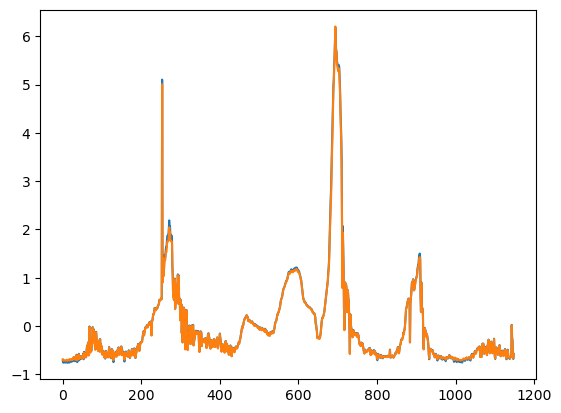

In [16]:
plt.plot(X_n)
plt.plot(y_pred)

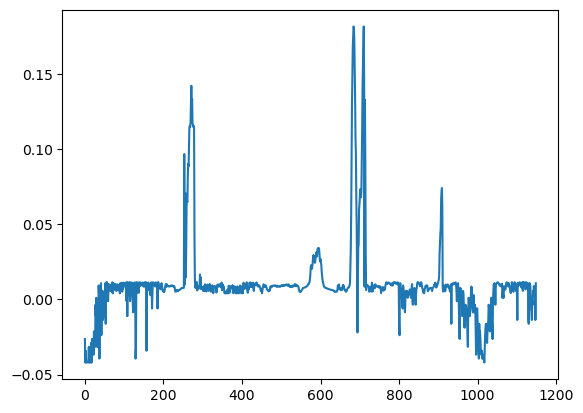

In [17]:
plt.plot(X_n-y_pred)

In [18]:
# Calculate mean and variance for inverse scaling

mu = np.mean(X)
var = np.var(X)
print(mu,var)

113.32375979112271 22586.319896742993


In [19]:
# Inverse transform predictions to get them in their original scale
y_pred_original_scale = (y_pred * np.sqrt(var)) + mu

In [22]:
import pandas as pd
df_gru = pd.DataFrame()

df_gru['X'] = X

df_gru['y_pred_original_scale'] = y_pred_original_scale

df_gru['Err'] = df_gru['y_pred_original_scale'] - df_gru['X']

df_gru['Err_Sqr'] = df_gru['Err']**2

MSE = df_gru['Err_Sqr'].sum() / len(df_gru)

print(df_gru)
print(MSE)



         X  y_pred_original_scale       Err    Err_Sqr
0      6.0               9.958298  3.958298  15.668121
1      0.0               6.309540  6.309540  39.810292
2      3.0               8.135826  5.135826  26.376710
3      0.0               6.309540  6.309540  39.810292
4      0.0               6.309540  6.309540  39.810292
...    ...                    ...       ...        ...
1144  76.0              75.012436 -0.987564   0.975283
1145  68.0              67.385345 -0.614655   0.377800
1146  23.0              21.706589 -1.293411   1.672913
1147  11.0              13.053444  2.053444   4.216632
1148  27.0              25.372337 -1.627663   2.649286

[1149 rows x 4 columns]
18.496967603384633


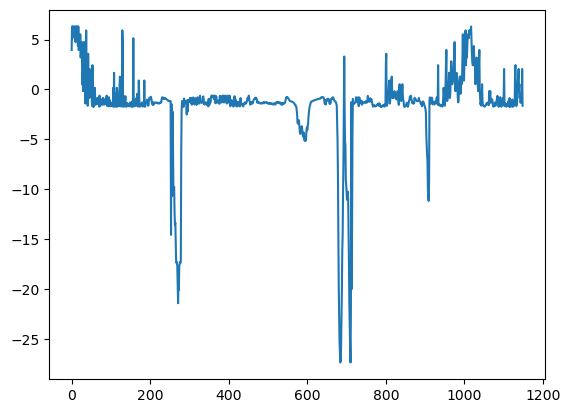

In [23]:
plt.plot(df_gru['Err'])

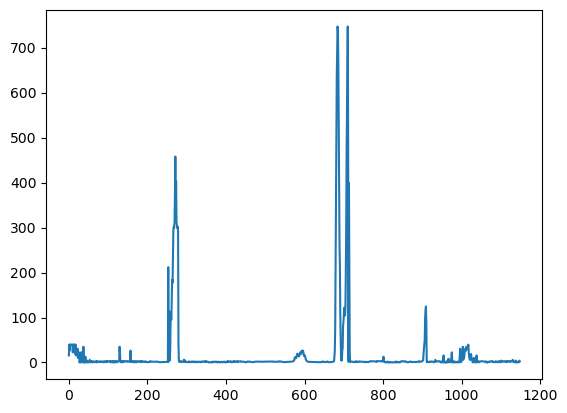

In [24]:
plt.plot(df_gru['Err_Sqr'])

(array([  7.,   6.,  13.,   9.,  10.,  13.,  28., 897., 101.,  65.]),
 array([-27.33337402, -23.96908264, -20.60479126, -17.24049988,
        -13.8762085 , -10.51191711,  -7.14762573,  -3.78333435,
         -0.41904297,   2.94524841,   6.30953979]),
 <BarContainer object of 10 artists>)

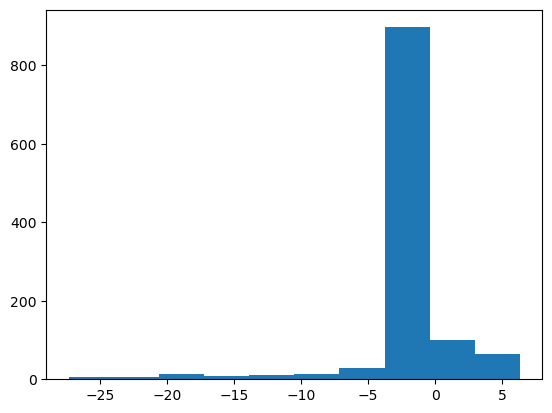

In [25]:
plt.hist(df_gru['Err'])

In [ ]:
from keras.models import save_model

# Save the model to a file
model.save("my_gru_model_dropout.h5")
